In [1]:
import pandas as pd
file = 'train.csv'
trip_df = []
for chunk in pd.read_csv(file, chunksize=1000):
    trip_df.append(chunk)
trip_df = pd.concat(trip_df, axis='rows')

In [2]:
#Use pseudo-random boolean array to take 10% sample of original dataset
import numpy as np
n = trip_df.shape[0]
np.random.seed(30)
sample = np.random.random(n)
mask = sample <= 0.1

In [3]:
trip_df = trip_df.loc[mask]

In [4]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145616 entries, 15 to 1458622
Data columns (total 11 columns):
id                    145616 non-null object
vendor_id             145616 non-null int64
pickup_datetime       145616 non-null object
dropoff_datetime      145616 non-null object
passenger_count       145616 non-null int64
pickup_longitude      145616 non-null float64
pickup_latitude       145616 non-null float64
dropoff_longitude     145616 non-null float64
dropoff_latitude      145616 non-null float64
store_and_fwd_flag    145616 non-null object
trip_duration         145616 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 11.1+ MB


In [5]:
print(trip_df.head())

           id  vendor_id      pickup_datetime     dropoff_datetime  \
15  id3319787          1  2016-05-16 15:29:02  2016-05-16 15:32:33   
23  id1603037          1  2016-06-25 10:36:26  2016-06-25 10:55:49   
28  id3973319          2  2016-06-13 21:57:27  2016-06-13 22:12:19   
49  id2662609          1  2016-04-10 19:11:03  2016-04-10 19:25:39   
58  id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   

    passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
15                1        -73.955513        40.768593         -73.948761   
23                1        -73.993553        40.747173         -74.006142   
28                1        -73.994217        40.713306         -73.982849   
49                1        -73.965469        40.765846         -73.960953   
58                1        -73.994484        40.745087         -73.998993   

    dropoff_latitude store_and_fwd_flag  trip_duration  
15         40.771545                  N            211  
23

In [6]:
dates = []
for i in trip_df['pickup_datetime']:
    dates.append(i[:10])
trip_df['date'] = pd.to_datetime(dates)

In [7]:
#Convert vendor ID from Int64 to Categorical
trip_df['vendor_id'] = trip_df['vendor_id'].astype('category')
#Pickup and drop off should be in Datetime format
trip_df['pickup_datetime'] = pd.to_datetime(trip_df['pickup_datetime'])
trip_df['dropoff_datetime'] = pd.to_datetime(trip_df['dropoff_datetime'])

In [8]:
print(trip_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145616 entries, 15 to 1458622
Data columns (total 12 columns):
id                    145616 non-null object
vendor_id             145616 non-null category
pickup_datetime       145616 non-null datetime64[ns]
dropoff_datetime      145616 non-null datetime64[ns]
passenger_count       145616 non-null int64
pickup_longitude      145616 non-null float64
pickup_latitude       145616 non-null float64
dropoff_longitude     145616 non-null float64
dropoff_latitude      145616 non-null float64
store_and_fwd_flag    145616 non-null object
trip_duration         145616 non-null int64
date                  145616 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](3), float64(4), int64(2), object(2)
memory usage: 12.4+ MB
None


In [9]:
#Trip duration as TimeDelta
trip_df['trip_duration'] = trip_df['dropoff_datetime'] - trip_df['pickup_datetime']

In [10]:
#Store and forward flag to boolean
flag = {'N':False, 'Y': True}
trip_df['store_and_fwd_flag'] = trip_df['store_and_fwd_flag'].map(flag)

In [11]:
#Import weather data
file2 = 'NYCweather2016.csv'
weather = pd.read_csv(file2)
print(weather.info())
print(weather.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 20 columns):
STATION      2375 non-null object
NAME         2375 non-null object
LATITUDE     2375 non-null float64
LONGITUDE    2375 non-null float64
ELEVATION    2375 non-null float64
DATE         2375 non-null object
AWND         1088 non-null float64
PRCP         2372 non-null float64
SNOW         1871 non-null float64
SNWD         1132 non-null float64
TAVG         732 non-null float64
TMAX         1098 non-null float64
TMIN         1098 non-null float64
WT01         353 non-null float64
WT02         33 non-null float64
WT03         44 non-null float64
WT04         7 non-null float64
WT06         7 non-null float64
WT08         197 non-null float64
WT09         4 non-null float64
dtypes: float64(17), object(3)
memory usage: 343.3+ KB
None
       STATION                         NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42

In [12]:
weather = weather.dropna(axis='columns', thresh=(weather.shape[0]/4))
weather['DATE'] = pd.to_datetime(weather['DATE'])
print(weather.head())

       STATION                         NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

        DATE  AWND  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  
0 2016-01-01  7.61   0.0   0.0   0.0   NaN  42.0  34.0  
1 2016-01-02  6.71   0.0   0.0   0.0   NaN  40.0  32.0  
2 2016-01-03  7.83   0.0   0.0   0.0   NaN  45.0  35.0  
3 2016-01-04  8.50   0.0   0.0   0.0   NaN  36.0  14.0  
4 2016-01-05  5.14   0.0   0.0   0.0   NaN  29.0  11.0  


In [13]:
origin_coord = list(zip(trip_df['pickup_latitude'], trip_df['pickup_longitude']))
weather['STATION_COORD'] = list(zip(weather['LATITUDE'], weather['LONGITUDE']))
stations = weather[['NAME', 'STATION_COORD']].drop_duplicates()

In [14]:
print(stations)

                                  NAME          STATION_COORD
0          NY CITY CENTRAL PARK, NY US  (40.77898, -73.96925)
366       MIDDLE VILLAGE 0.5 SW, NY US    (40.7145, -73.8819)
717          LA GUARDIA AIRPORT, NY US      (40.7792, -73.88)
1083       STATEN ISLAND 1.4 SE, NY US    (40.5674, -74.1327)
1428  JFK INTERNATIONAL AIRPORT, NY US    (40.6386, -73.7622)
1794      STATEN ISLAND 4.5 SSE, NY US    (40.5421, -74.1476)
2143            BROOKLYN 3.1 NW, NY US    (40.6846, -73.9867)


In [15]:
#Match pickup location to nearest weather station using distance between Cartesian coordinates
weather_station = {}
local_station = []
distances = []
for loc in origin_coord:
    for index, station in stations.iterrows():    
        dist = ((loc[0] - station[1][0])**2 + (loc[1] - station[1][1])**2)**.5
        weather_station[dist] = station[0]
        distances.append(dist)
    local_station.append(weather_station[min(distances)])
    distances = []
    weather_station = {}

In [16]:
trip_df['local_station'] = local_station

In [17]:
print(trip_df['local_station'].value_counts())

NY CITY CENTRAL PARK, NY US         108371
BROOKLYN 3.1 NW, NY US               29003
LA GUARDIA AIRPORT, NY US             4264
JFK INTERNATIONAL AIRPORT, NY US      3338
MIDDLE VILLAGE 0.5 SW, NY US           609
STATEN ISLAND 1.4 SE, NY US             25
STATEN ISLAND 4.5 SSE, NY US             6
Name: local_station, dtype: int64


In [18]:
nyc_taxi = pd.merge(trip_df, weather, how='left', left_on=['date', 'local_station'], right_on = ['DATE', 'NAME'])

In [19]:
nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145616 entries, 0 to 145615
Data columns (total 27 columns):
id                    145616 non-null object
vendor_id             145616 non-null category
pickup_datetime       145616 non-null datetime64[ns]
dropoff_datetime      145616 non-null datetime64[ns]
passenger_count       145616 non-null int64
pickup_longitude      145616 non-null float64
pickup_latitude       145616 non-null float64
dropoff_longitude     145616 non-null float64
dropoff_latitude      145616 non-null float64
store_and_fwd_flag    145616 non-null bool
trip_duration         145616 non-null timedelta64[ns]
date                  145616 non-null datetime64[ns]
local_station         145616 non-null object
STATION               134925 non-null object
NAME                  134925 non-null object
LATITUDE              134925 non-null float64
LONGITUDE             134925 non-null float64
ELEVATION             134925 non-null float64
DATE                  134925 non-null da

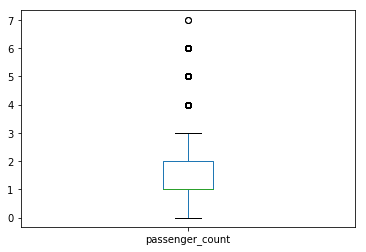

In [20]:
#May need to remove outlier from passenger count
import matplotlib.pyplot as plt
trip_df['passenger_count'].plot(kind='box')
plt.show()
#Possible mistake? Replace all values from 5-9 with 4?

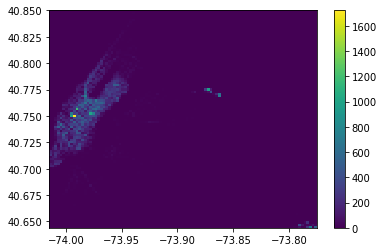

In [21]:
#Heat map of all taxi pickup locations
plt.hist2d(trip_df['pickup_longitude'], trip_df['pickup_latitude'], bins=(100, 100), 
           range=((-74.015, -73.775),(40.644, 40.85)))
plt.colorbar()
plt.show()